In [4]:
import pandas as pd

In [5]:

df = pd.read_csv('nanopore-og.csv')


In [6]:
df


,Refs,Reads
0,ACCATAATGCGTGGGGCCGACCTCGGAATGCGGTCTCCATGCGCGT...,ACCATAATGCGTGGGGCTGACCTCGGAATGCGTGGTCTCCATGCGC...
1,ACCATAATGCGTGGGGCCGACCTCGGAATGCGGTCTCCATGCGCGT...,ACCATAATGCGTGGGGCCGACCTCGGAATGCGGTCTCCATGCGCGT...
2,ACCATAATGCGTGGGGCCGACCTCGGAATGCGGTCTCCATGCGCGT...,ACCATAATGCGTGGGGCCGACCTCGGGAATGCGGTCTCCATGCGCG...
3,ACCATAATGCGTGGGGCCGACCTCGGAATGCGGTCTCCATGCGCGT...,ACCATAATGCGTGGGCCGACCTCAGAATGCGGTCTCCATGCGCGTT...
4,ACCATAATGCGTGGGGCCGACCTCGGAATGCGGTCTCCATGCGCGT...,ACCATAATGCGTGGGGCCGACCTCGGAGATGCGGTCACCATGCGCG...
...,...,...
269704,ATCGTGGTATCCCTCCAACCCGAATGACCTGGCGAGGCAGATCAAC...,TATCGTGGTATCCTCCAACCCGAATGACCTGGCGAGGCAGATCAAC...
269705,ATCGTGGTATCCCTCCAACCCGAATGACCTGGCGAGGCAGATCAAC...,ATCGTGGTATCCCTCCAACCCGAATGACCTGGCGAGGCAGATCAAC...
269706,ATCGTGGTATCCCTCCAACCCGAATGACCTGGCGAGGCAGATCAAC...,AATGCAATCCTCCAACCCGAATGACCTGGCGAGGCAGATCAACTTG...
269707,ATCGTGGTATCCCTCCAACCCGAATGACCTGGCGAGGCAGATCAAC...,ATCGTGGTATCCCTCCAACCCGAATGACCTGGCGAGGCAGATCAAC...


In [7]:
from tqdm import tqdm


In [8]:
noisy_strands = [s.strip() for s in list(df['Reads'])]


In [9]:
ref_strands = [s.strip() for s in list(df['Refs'])]


In [10]:
import difflib


In [11]:
def print_diff(ref_strand, noisy_strand):
    global pairs
    global pairs_no_pos
    a, b = 0, 0

    for match in difflib.SequenceMatcher(None, ref_strand, noisy_strand, autojunk=False).get_matching_blocks():
        was = ref_strand[a:match.a]
        now = noisy_strand[b:match.b]
        
        a = match.a + match.size
        b = match.b + match.size
        
        if was == '' and now == '':
            pass
        else:
            # print('{}|{}'.format(was, now), end=', ')
            pairs += [(was, now, match.a)]
            pairs_no_pos += [(was, now)]
            
        
    #print('')


In [12]:
pairs = []
pairs_no_pos = []

for i in tqdm(range(len(ref_strands))):
    if ref_strands[i] != noisy_strands[i]:
        #print(i, end=': ')
        print_diff(ref_strands[i], noisy_strands[i])


100%|██████████| 269709/269709 [04:02<00:00, 1114.01it/s]


In [13]:
import numpy as np


In [14]:
subs_no_pos, counts_no_pos = np.unique(pairs_no_pos, return_counts=True, axis=0)
sorting = np.argsort(counts_no_pos)
subs_no_pos = subs_no_pos[sorting]
counts_no_pos = counts_no_pos[sorting]

In [15]:
subs, counts = np.unique(pairs, return_counts=True, axis=0)
sorting = np.argsort(counts)
subs = subs[sorting]
counts = counts[sorting]


In [16]:
for sub, count in zip(subs, counts):
    if count > 1000:
        print("{} -> {} @ {}".format(sub[0], sub[1], sub[2]), count)

G ->  @ 2 1005
C -> T @ 2 1013
A -> G @ 110 1045
G -> A @ 110 1086
TC ->  @ 2 1091
G ->  @ 1 1137
 -> T @ 110 1171
T ->  @ 110 1220
C ->  @ 110 1346
C -> T @ 1 1482
A ->  @ 110 1557
T ->  @ 1 1901
 -> TC @ 0 3851
 -> A @ 110 4175
 -> G @ 110 4433
 -> C @ 0 4997
C ->  @ 1 5282
 -> T @ 0 5536
G ->  @ 110 6603


In [17]:
def get_key(char1, char2):
    char1 = char1 if char1 != '' else '_'
    char2 = char2 if char2 != '' else '_'
    return char1 + char2


In [18]:

strand_len = 110
pos_map = {}
pos_counts = [0] * (strand_len + 1)
for sub, count in zip(subs, counts):
    key = get_key(sub[0], sub[1])
    if key not in pos_map:
        pos_map[key] = [0] * (strand_len + 1)
    pos_map[key][int(sub[2])] += count

print(pos_map['_T'])

[5536, 398, 691, 455, 502, 467, 440, 474, 524, 554, 589, 537, 540, 542, 544, 537, 523, 537, 532, 564, 553, 573, 557, 507, 548, 508, 542, 565, 604, 614, 566, 607, 562, 628, 614, 598, 589, 606, 542, 539, 617, 579, 675, 637, 565, 585, 591, 624, 623, 615, 609, 609, 591, 635, 573, 576, 577, 569, 591, 571, 623, 653, 624, 589, 607, 648, 605, 648, 571, 592, 661, 575, 578, 588, 613, 607, 552, 543, 626, 603, 563, 628, 622, 588, 574, 620, 592, 573, 545, 584, 553, 549, 562, 534, 526, 579, 568, 580, 594, 688, 684, 837, 890, 872, 628, 544, 535, 540, 566, 457, 1171]


In [19]:
import matplotlib.pyplot as plt

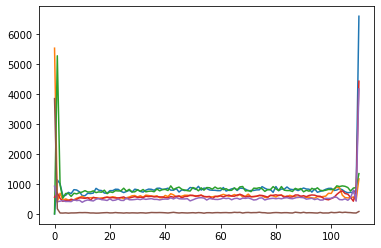

In [20]:
keys = ['G_', '_T', 'C_', '_G', '_A', '_TC']
for key in keys:
    plt.plot(range(strand_len + 1), pos_map[key])

In [21]:
np.save('subs.npy', subs)
np.save('counts.npy', counts)